<a href="https://colab.research.google.com/github/Santosh503/Python_Fundamentals_Assignment./blob/main/Python_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import seaborn as sns

In [2]:
file="https://raw.githubusercontent.com/mohammedAljadd/students-performance-prediction/refs/heads/main/student-data.csv"
df=pd.read_csv(file)

In [3]:
df.head(8)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,yes
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,4,1,1,3,0,yes
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,no,4,1,4,1,1,1,6,no


In [4]:
features=df[['failures','health','age','studytime']]
target=df['passed']

X=features.values
y=target.values

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [6]:
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)
y_train = y_train.map({'yes': 1, 'no': 0})
y_test = y_test.map({'yes': 1, 'no': 0})

In [7]:
scaler=StandardScaler() #to fix weight of multiple features and make it in same range
# normalizing values of x_train and x_test
X_train = scaler.fit_transform(X_train) #normalizing -->look for details
X_test=scaler.transform(X_test) #->>

In [8]:
X_train=torch.tensor(X_train, dtype=torch.float32)
X_test=torch.tensor(X_test, dtype=torch.float32)

y_train=torch.tensor(y_train, dtype = int)
y_test=torch.tensor(y_test, dtype = int)

In [9]:
class MultiClassClassifier(nn.Module):
  def __init__(self):
    super(MultiClassClassifier, self).__init__()
    #like deep nerural networks-> Multi Layers
    self.linear1=nn.Linear(4, 10) # 4 in 10 out -> number of input, number of hidden layers
    self.linear2=nn.Linear(10, 6) # 10 in 6 out -> number of hiddden layers, number of hidden layers
    self.linear3=nn.Linear(6, 3)  # 6 in 3 out -> number of hisden layers, number of categories of target

  def forward(self, x):
    x1 = torch.relu(self.linear1(x))
    x2 = torch.relu(self.linear2(x1))
    x3 = self.linear3(x2)
    return x3

In [10]:
model = MultiClassClassifier()
loss = nn.CrossEntropyLoss()
criteria = torch.optim.SGD(model.parameters(), lr = 0.05)
num_epochs=1000 #number of times

In [11]:
  # creating lists to store etst and train loss
train_loss=[]
test_loss=[]

In [12]:
# training loop
for ep in range(num_epochs):
  model.train()
  predicted_y = model(X_train)
  losses = loss(predicted_y, y_train)

  #feedback
  criteria.zero_grad()
  losses.backward()
  criteria.step()
  print(losses.item())

  train_loss.append(losses.item())
  model.eval()
  with torch.no_grad():
    predicted_test_y=model(X_test)
    loss_test=loss(predicted_test_y,y_test)
    test_loss.append(loss_test.item())

1.2718254327774048
1.2435357570648193
1.21792733669281
1.1944701671600342
1.1728575229644775
1.1528648138046265
1.134316325187683
1.1171003580093384
1.1012094020843506
1.086329460144043
1.072384238243103
1.0592557191848755
1.0468780994415283
1.0352377891540527
1.0242226123809814
1.0138134956359863
1.0039348602294922
0.9945889115333557
0.9856840968132019
0.9771896600723267
0.9690827131271362
0.961338460445404
0.9539597630500793
0.9469015598297119
0.9401458501815796
0.9337255954742432
0.9275632500648499
0.9216393828392029
0.9159489870071411
0.9104867577552795
0.9052121043205261
0.9001299738883972
0.8952368497848511
0.8905053734779358
0.8859338164329529
0.8815221786499023
0.877251923084259
0.8731111884117126
0.8690945506095886
0.8651933073997498
0.8614084720611572
0.857732355594635
0.8541584014892578
0.8506872653961182
0.8473197817802429
0.8440443873405457
0.8408582806587219
0.8377481698989868
0.8347215056419373
0.8317699432373047
0.8288930654525757
0.8260873556137085
0.8233528733253479
0

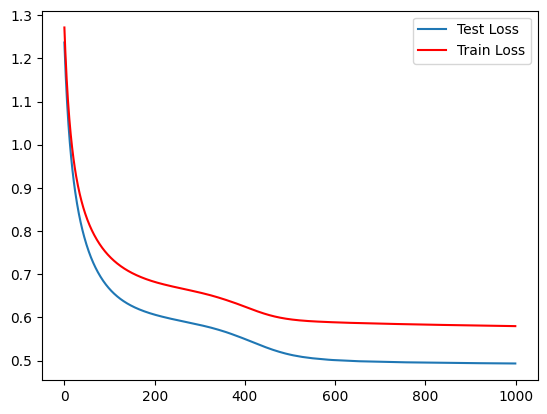

In [13]:
plt.plot(test_loss, label = 'Test Loss')
plt.plot(train_loss, color='red', label = 'Train Loss')
plt.legend()
plt.show()

[[ 8 11]
 [ 4 56]]


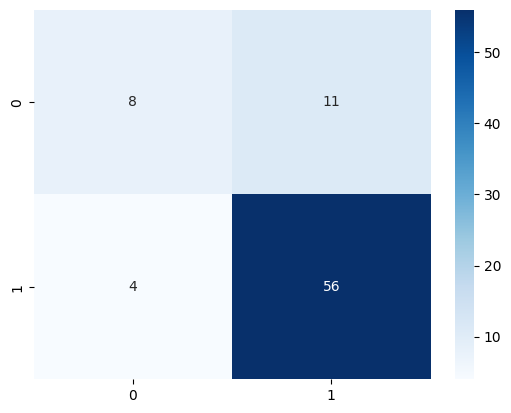

In [15]:
from sklearn.metrics import confusion_matrix

# Get predicted probabilities from the model
predicted_probs = model(X_test)

# Get predicted classes by selecting the class with the highest probability
predicted_classes = torch.argmax(predicted_probs, dim=1)

# Convert predicted_classes to numpy array to work with confusion_matrix
predicted_classes = predicted_classes.cpu().numpy()

cm = confusion_matrix(y_test, predicted_classes)
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels='auto', yticklabels='auto')
plt.show()

In [16]:
#calculating accuracy
with torch.no_grad():
  outputs=model(X_test)
  _, predicted_classes=torch.max(outputs.data,1)  #get predicted classes

accuracy=(predicted_classes==y_test).sum().item()/y_test.size(0)
print(accuracy)

0.810126582278481
